<a href="https://colab.research.google.com/github/BeverlyHuang/wine_quality/blob/master/452_HW3_Beverly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Wine Quality

###Import Libraries

In [0]:
!pip install ggplot

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ggplot import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

###Load Data

In [0]:
wine_df = pd.read_csv("https://raw.githubusercontent.com/BeverlyHuang/wine_quality/master/winequality-red.csv")
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### EDA using Seaborn and ggplot

####Seaborn Pairplot

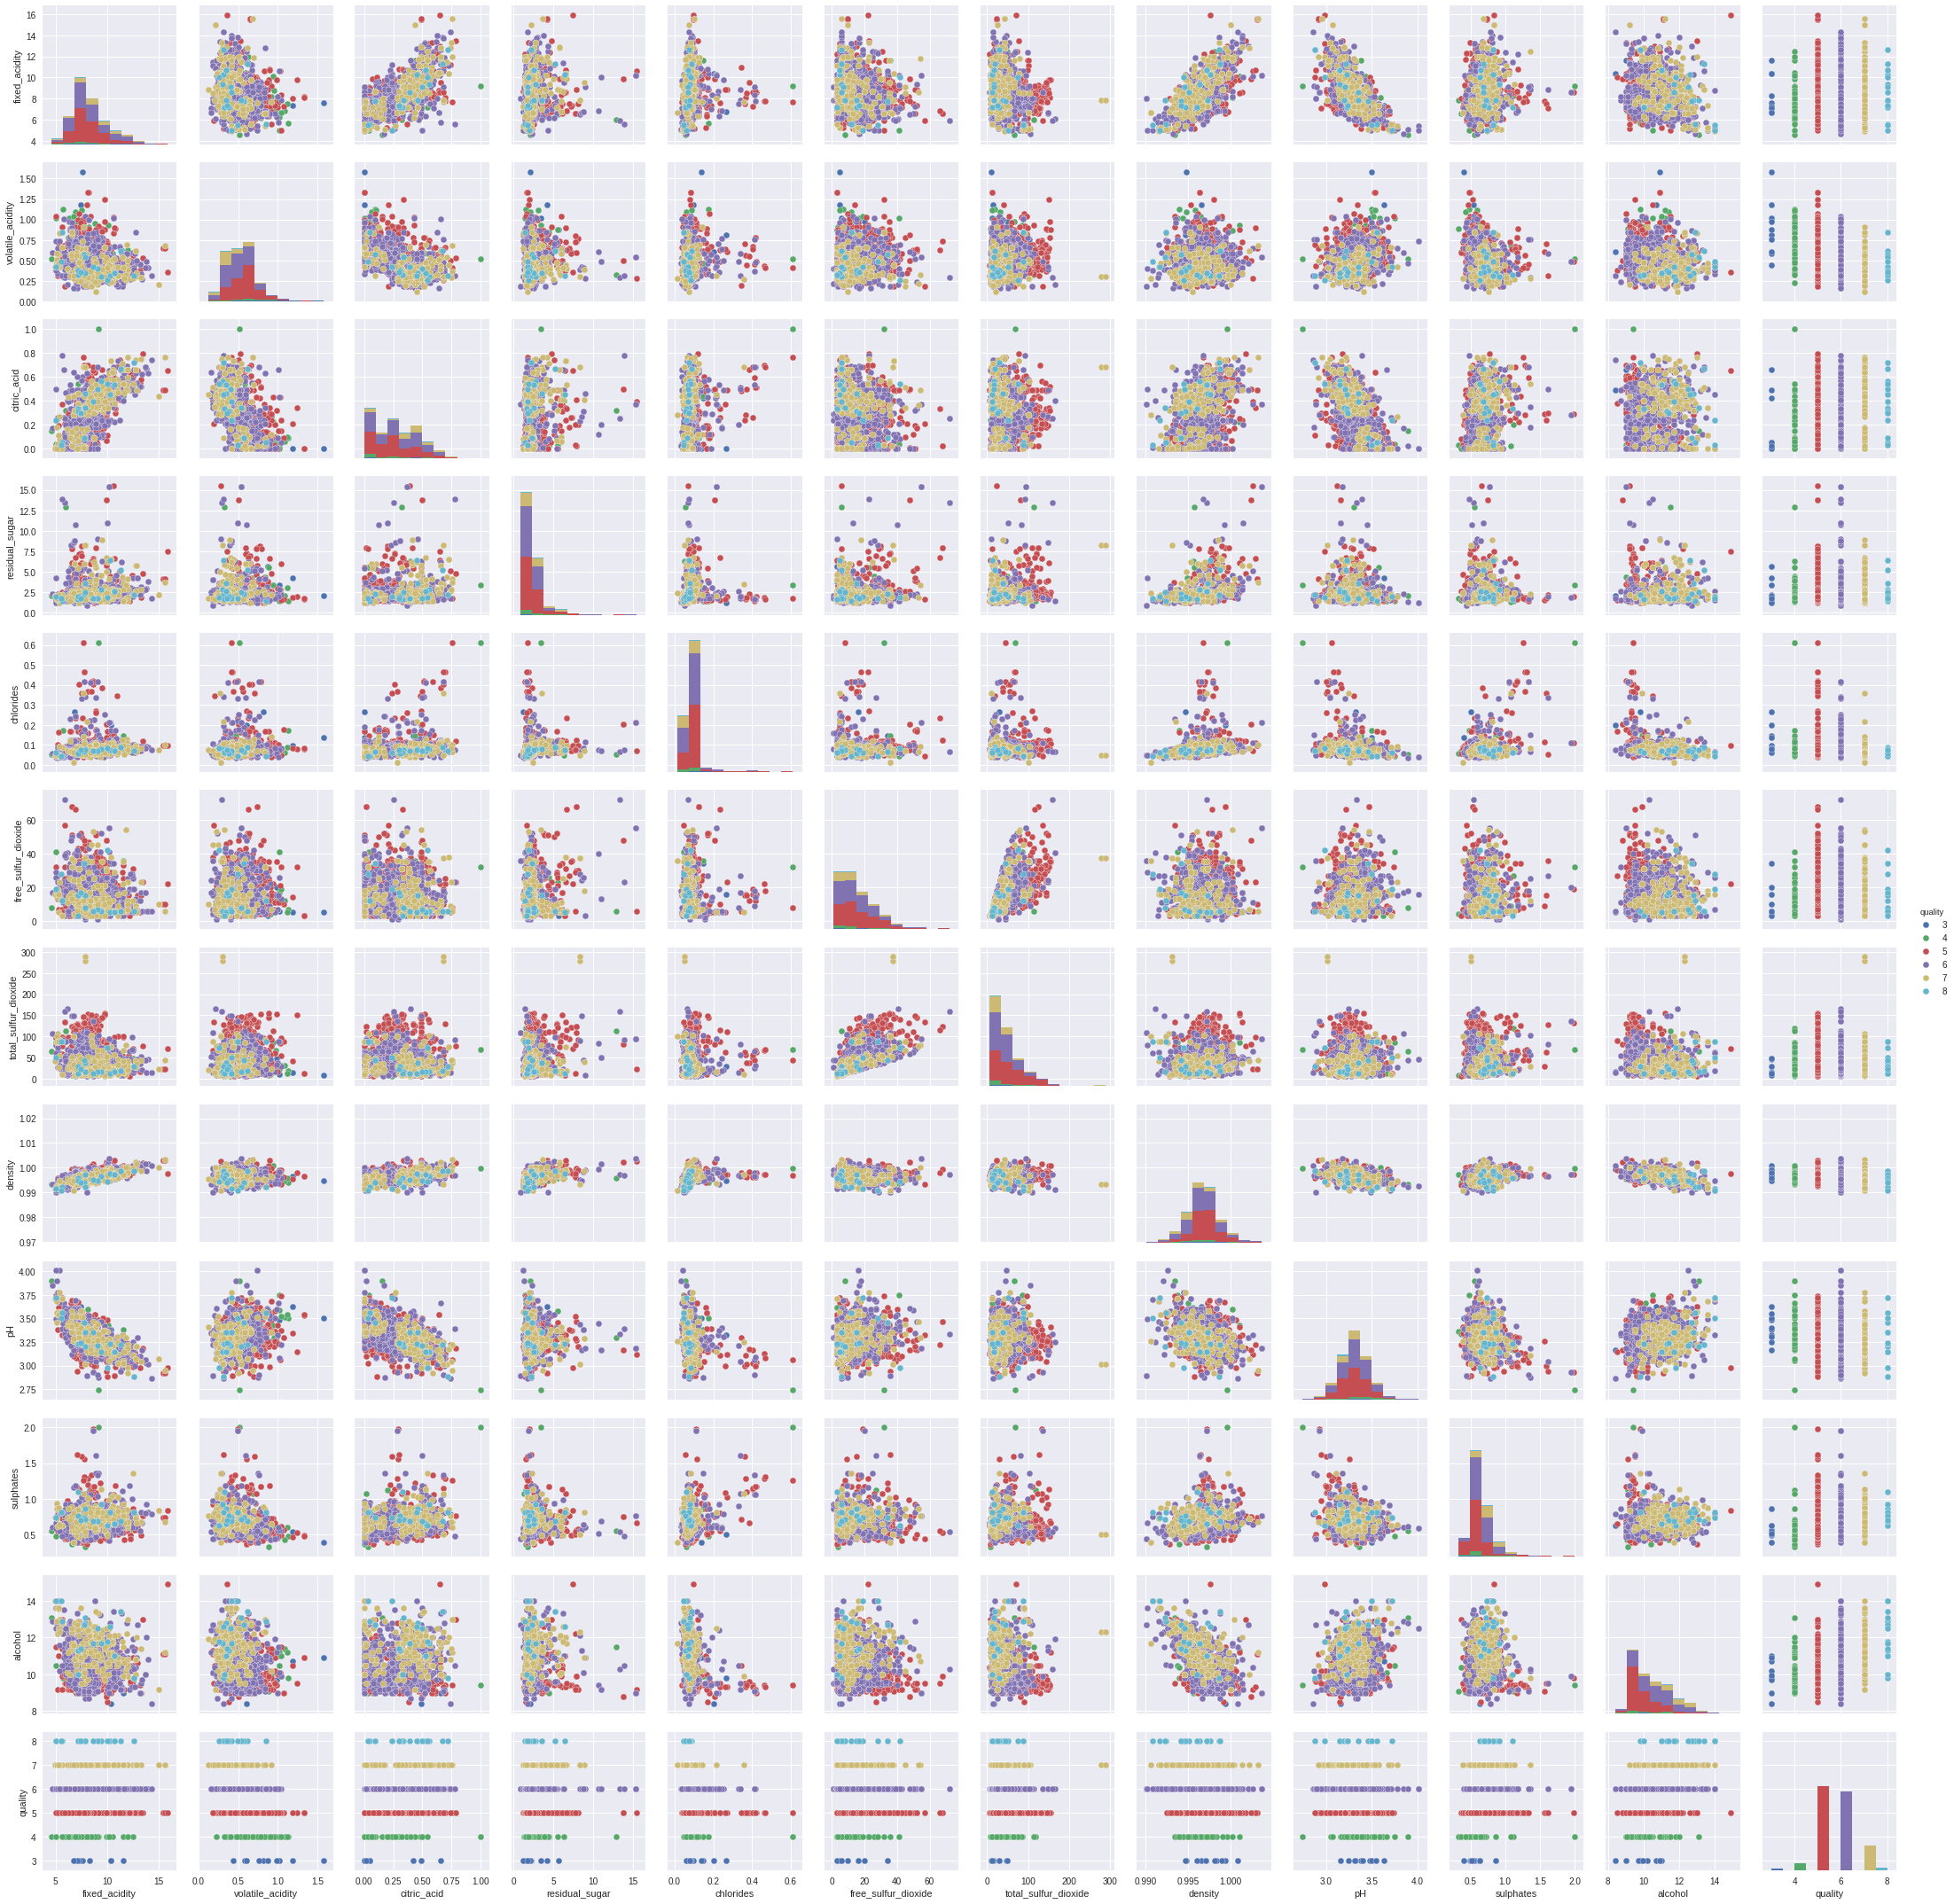

In [0]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:50% !important; }</style>"))
sns.pairplot(wine_df, hue="quality")

#### Seaborn Correlation Heatmap

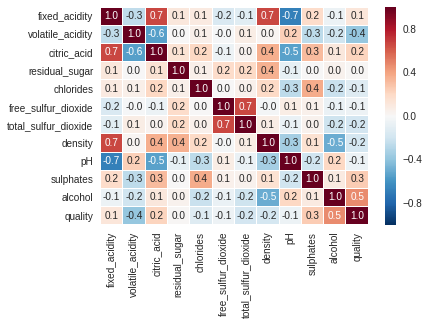

In [0]:
corr = wine_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, 
            annot=True, linewidths=0.01, fmt= '.1f')

### ggplot

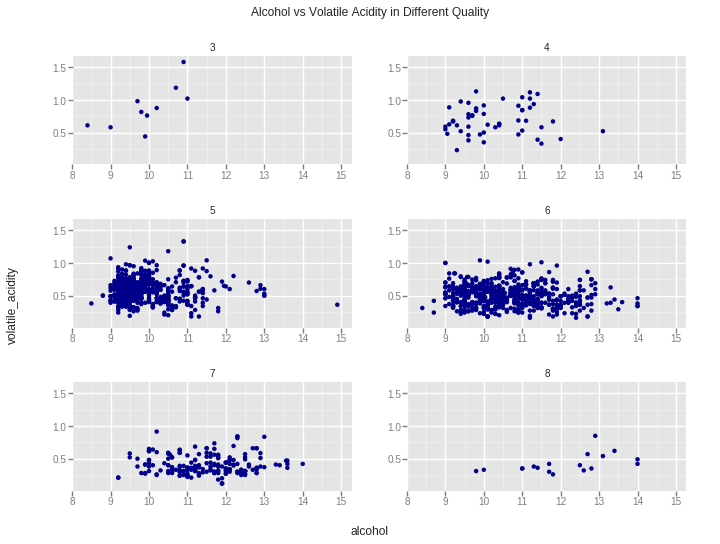

<ggplot: (-9223363306598085074)>

In [0]:
ggplot(wine_df , aes(x = 'alcohol' , y = 'volatile_acidity')) +\
  geom_point(color='darkblue') +\
  ggtitle("Alcohol vs Volatile Acidity in Different Quality") + \
  xlab("alcohol") + \
  ylab("volatile_acidity") +\
  facet_wrap('quality')

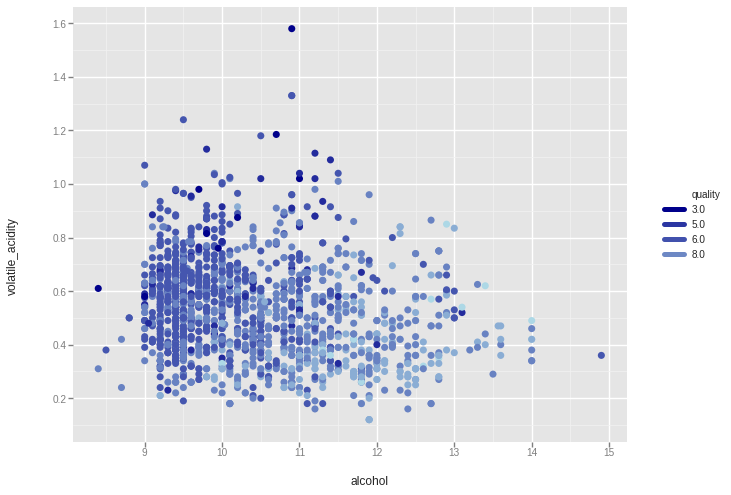

<ggplot: (-9223363306594520334)>

In [0]:
ggplot(wine_df, aes(x="alcohol", y="volatile_acidity", color="quality")) +\
  geom_point(size=50) + scale_color_gradient(low = 'darkblue', high = 'lightblue')

### KNN Modeling with Original Quality Labels

#### Seperate features and target

In [0]:
X = wine_df.iloc[:,:-1]
y = wine_df.iloc[:, -1]

####Train/Test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# apply standard scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#### KNN score

In [0]:
knn.score(X_test, y_test)

0.5770833333333333

####Find the best K

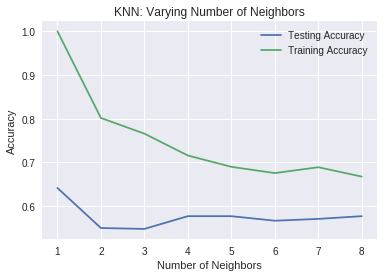

In [0]:
# set up array to store train/test accuracy
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# loop over different k
for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)

# generate plot
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, test_accuracy, label = "Testing Accuracy")
plt.plot(neighbors, train_accuracy, label = "Training Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

####Use the best K to fit the model

In [0]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.5479166666666667

#### Classfication Report


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.04      0.06      0.05        16
           5       0.65      0.64      0.64       204
           6       0.54      0.55      0.55       192
           7       0.49      0.43      0.46        60
           8       0.00      0.00      0.00         5

   micro avg       0.55      0.55      0.55       480
   macro avg       0.29      0.28      0.28       480
weighted avg       0.56      0.55      0.55       480



### KNN Modeling with Transformed Quality Labels

In [0]:
# divide wine into good, medium and bad quality level
bins = (2, 5, 7, 8)
group_names = ['bad', 'medium', 'good']
wine_df['quality_level'] = pd.cut(wine_df['quality'], bins = bins, labels = group_names)
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


In [0]:
wine_df['quality_level'].value_counts()

medium    837
bad       744
good       18
Name: quality_level, dtype: int64

In [0]:
# assign a label to quality level
label_quality = LabelEncoder()

# bad becomes 0 and good becomes 1 
wine_df['quality_level'] = label_quality.fit_transform(wine_df['quality_level'])

wine_df['quality_level'].value_counts()

2    837
0    744
1     18
Name: quality_level, dtype: int64

#### Seperate features and target

In [0]:
X = wine_df.iloc[:,:-2]
y = wine_df.iloc[:, -1]

####Train/Test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# apply standard scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#### KNN score

In [0]:
knn.score(X_test, y_test)

0.7041666666666667

####Find the best K

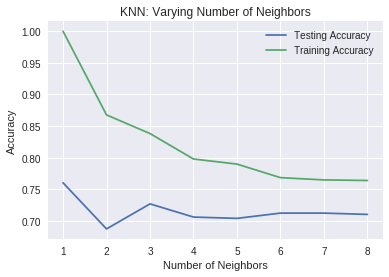

In [0]:
# set up array to store train/test accuracy
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# loop over different k
for i, k in enumerate(neighbors):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)

# generate plot
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, test_accuracy, label = "Testing Accuracy")
plt.plot(neighbors, train_accuracy, label = "Training Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

####Use the best K to fit the model

In [0]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.7604166666666666

#### Classfication Report


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       223
           1       0.00      0.00      0.00         6
           2       0.77      0.79      0.78       251

   micro avg       0.76      0.76      0.76       480
   macro avg       0.51      0.51      0.51       480
weighted avg       0.76      0.76      0.76       480

